In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
audit = pd.read_csv('audit_risk.csv')

In [3]:
audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
 trial = pd.read_csv('trial.csv')

In [5]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [6]:
print("Shape of audit dataset",audit.shape)
print("shape of trial dataset",trial.shape)

Shape of audit dataset (776, 27)
shape of trial dataset (776, 18)


In [7]:
audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [8]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [9]:
# number of unique values
audit.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [10]:
# number of unique values
trial.nunique()

Sector_score      13
LOCATION_ID       45
PARA_A           363
SCORE_A            3
PARA_B           358
SCORE_B            3
TOTAL            471
numbers            5
Marks              3
Money_Value      328
MONEY_Marks        3
District           3
Loss               3
LOSS_SCORE         3
History            7
History_score      3
Score             17
Risk               2
dtype: int64

In [11]:
#checking for missing values
audit.isnull().sum() 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [13]:
#checking for missing values
trial.isnull().sum() 

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [18]:
# get money_value data
Money_Value = audit['Money_Value']
df = pd.DataFrame(Money_Value)

In [21]:
median = audit["Money_Value"].median()
audit["Money_Value"].fillna(median, inplace=True)

In [22]:
#checking for missing values
audit.isnull().sum() 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [24]:
audit.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

(array([498.,  41., 237.]),
 array([ 1.85      , 21.18333333, 40.51666667, 59.85      ]),
 <BarContainer object of 3 artists>)

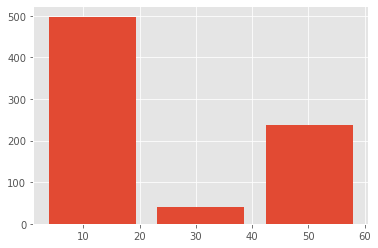

In [72]:
Sector_score =audit['Sector_score']
plt.hist(Sector_score , bins=3 , rwidth=0.8)

(array([149.,  51., 145., 150.,  41., 158.,  27.,  23.,  21.,  11.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <BarContainer object of 10 artists>)

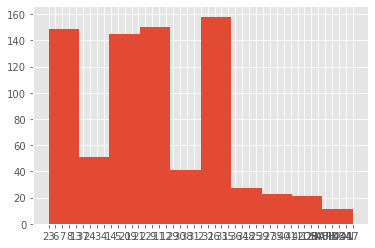

In [33]:
LOCATION_ID = audit['LOCATION_ID']
plt.hist(LOCATION_ID)

(array([766.,   6.,   1.,   1.,   2.]),
 array([ 0., 17., 34., 51., 68., 85.]),
 <BarContainer object of 5 artists>)

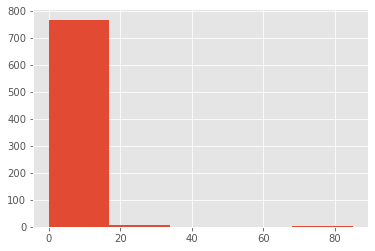

In [75]:
PARA_A = audit["PARA_A"]
plt.hist(PARA_A ,bins=5 , rwidth=2)

(array([411., 143., 222.]),
 array([0.2       , 0.33333333, 0.46666667, 0.6       ]),
 <BarContainer object of 3 artists>)

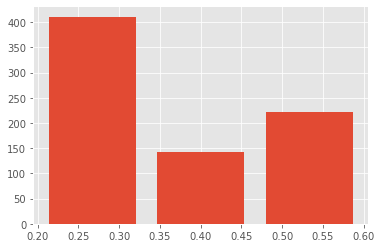

In [86]:
Score_A = audit["Score_A"]
plt.hist(Score_A, bins=3 , rwidth=0.8  )

(array([726.,  40.,   6.,   0.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

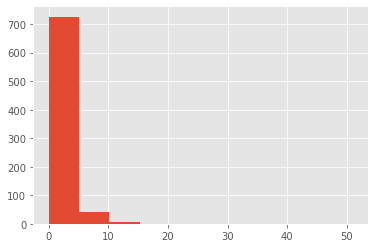

In [84]:
Risk_A = audit["Risk_A"]
plt.hist(Risk_A , bins=10 , rwidth= 1)

(array([772.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.   ,  126.463,  252.926,  379.389,  505.852,  632.315,
         758.778,  885.241, 1011.704, 1138.167, 1264.63 ]),
 <BarContainer object of 10 artists>)

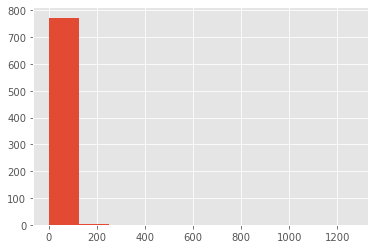

In [89]:
PARA_B = audit ["PARA_B"]
plt.hist(PARA_B)

(array([521.,  71., 184.]),
 array([0.2       , 0.33333333, 0.46666667, 0.6       ]),
 <BarContainer object of 3 artists>)

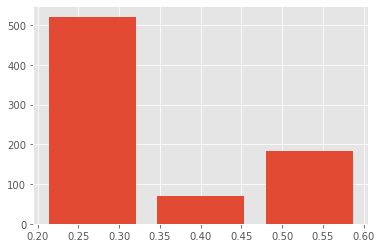

In [90]:
Score_B = audit["Score_B"]
plt.hist(Score_B , bins=3, rwidth = 0.8)

(array([772.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.    ,  75.8778, 151.7556, 227.6334, 303.5112, 379.389 ,
        455.2668, 531.1446, 607.0224, 682.9002, 758.778 ]),
 <BarContainer object of 10 artists>)

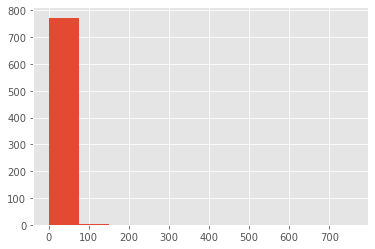

In [47]:
Risk_B = audit["Risk_B"]
plt.hist(Risk_B)

(array([772.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.   ,  126.891,  253.782,  380.673,  507.564,  634.455,
         761.346,  888.237, 1015.128, 1142.019, 1268.91 ]),
 <BarContainer object of 10 artists>)

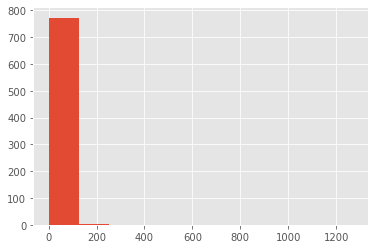

In [52]:
TOTAL = audit["TOTAL"]
plt.hist(TOTAL)

(array([706.,  48.,  14.,   7.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 10 artists>)

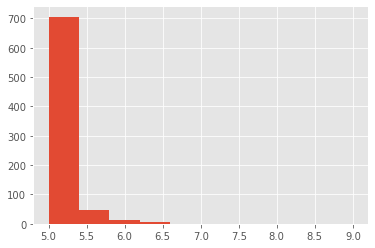

In [93]:
numbers = audit["numbers"]
plt.hist(numbers)

(array([706.,   0.,  48.,   0.,   0.,  14.,   7.,   0.,   0.,   1.]),
 array([1.  , 1.44, 1.88, 2.32, 2.76, 3.2 , 3.64, 4.08, 4.52, 4.96, 5.4 ]),
 <BarContainer object of 10 artists>)

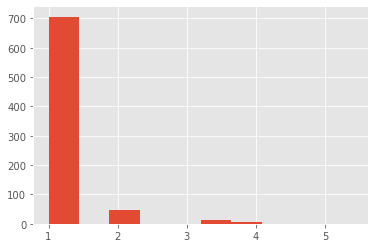

In [96]:
Risk_C = audit["Risk_C"]
plt.hist(Risk_C  )

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

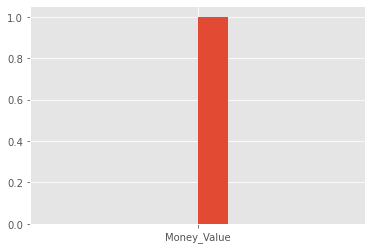

In [61]:
Money_Value = audit['Money_Value']
plt.hist('Money_Value')

(array([574.,   0.,   0.,   0.,   0.,  51.,   0.,   0.,   0., 151.]),
 array([0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 ]),
 <BarContainer object of 10 artists>)

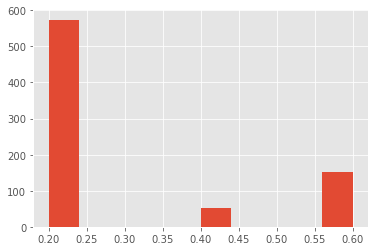

In [62]:
Score_MV =audit["Score_MV"]
plt.hist(Score_MV)

(array([755.,  13.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   3.]),
 array([  0.    ,  56.1018, 112.2036, 168.3054, 224.4072, 280.509 ,
        336.6108, 392.7126, 448.8144, 504.9162, 561.018 ]),
 <BarContainer object of 10 artists>)

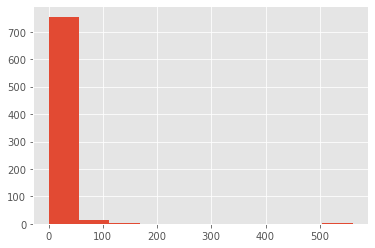

In [63]:
Risk_D = audit["Risk_D"]
plt.hist(Risk_D)

(array([653.,   0.,   0.,   0.,   0.,  50.,   0.,   0.,   0.,  73.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

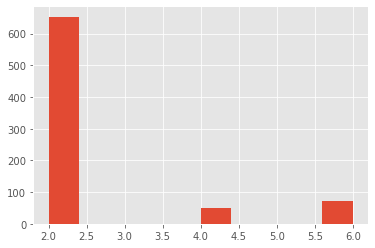

In [64]:
District_Loss = audit["District_Loss"]
plt.hist(District_Loss)

(array([754.,   0.,   0.,   0.,   0.,  20.,   0.,   0.,   0.,   2.]),
 array([0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 ]),
 <BarContainer object of 10 artists>)

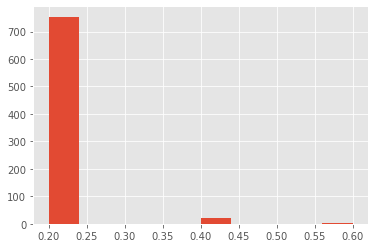

In [97]:
PROB = audit['PROB']
plt.hist(PROB)

(array([637.,   0.,  63.,  70.,   0.,   0.,   1.,   0.,   0.,   5.]),
 array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4]),
 <BarContainer object of 10 artists>)

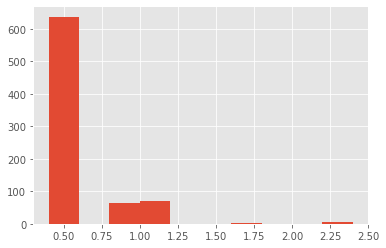

In [98]:
RiSk_E = audit["RiSk_E"]
plt.hist(RiSk_E)

(array([726.,  35.,   9.,   2.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

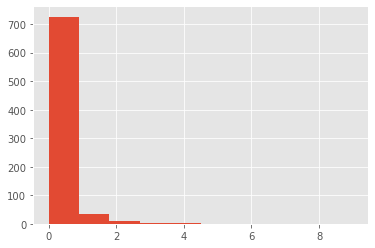

In [99]:
History = audit["History"]
plt.hist(History)

(array([726.,   0.,   0.,   0.,   0.,  35.,   0.,   0.,   0.,  15.]),
 array([0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 ]),
 <BarContainer object of 10 artists>)

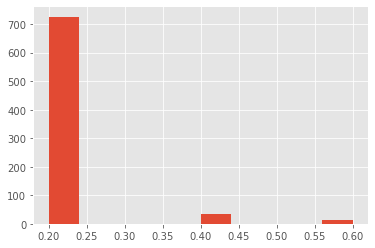

In [100]:
 Prob =audit["Prob"]
 plt.hist(Prob)   

(array([761.,   0.,   9.,   2.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.54, 1.08, 1.62, 2.16, 2.7 , 3.24, 3.78, 4.32, 4.86, 5.4 ]),
 <BarContainer object of 10 artists>)

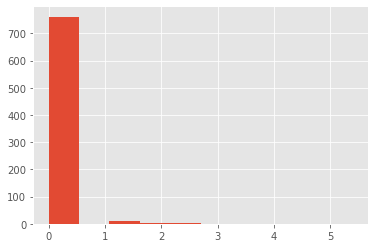

In [101]:
Risk_F = audit["Risk_F"]
plt.hist(Risk_F)

(array([387., 130.,  20.,  45.,  19.,  57.,  66.,  24.,  22.,   6.]),
 array([2.  , 2.32, 2.64, 2.96, 3.28, 3.6 , 3.92, 4.24, 4.56, 4.88, 5.2 ]),
 <BarContainer object of 10 artists>)

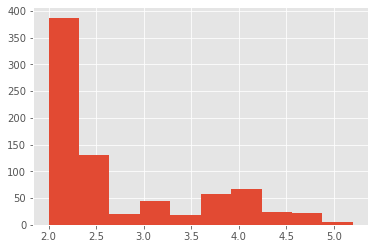

In [102]:
Score = audit["Score"]
plt.hist(Score)

(array([742.,  27.,   1.,   1.,   0.,   1.,   0.,   3.,   0.,   1.]),
 array([  1.4   ,  81.3862, 161.3724, 241.3586, 321.3448, 401.331 ,
        481.3172, 561.3034, 641.2896, 721.2758, 801.262 ]),
 <BarContainer object of 10 artists>)

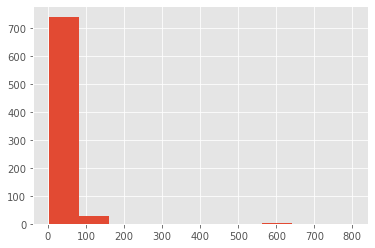

In [103]:
Inherent_Risk = audit["Inherent_Risk"]
plt.hist(Inherent_Risk)

(array([687.,  64.,  12.,   9.,   0.,   2.,   0.,   0.,   1.,   1.]),
 array([0.4 , 0.94, 1.48, 2.02, 2.56, 3.1 , 3.64, 4.18, 4.72, 5.26, 5.8 ]),
 <BarContainer object of 10 artists>)

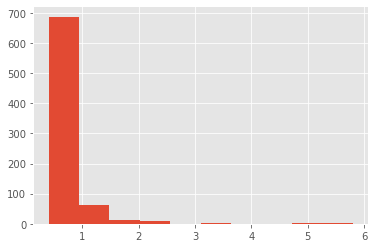

In [104]:
CONTROL_RISK =audit["CONTROL_RISK"]
plt.hist(CONTROL_RISK)

(array([  0.,   0.,   0.,   0.,   0., 776.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

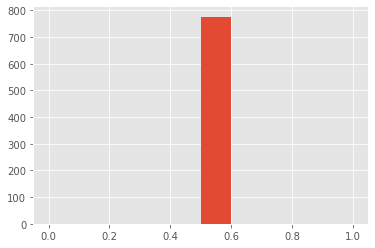

In [105]:
Detection_Risk =audit["Detection_Risk"]
plt.hist(Detection_Risk)

(array([768.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.8000000e-01, 9.6403440e+01, 1.9252688e+02, 2.8865032e+02,
        3.8477376e+02, 4.8089720e+02, 5.7702064e+02, 6.7314408e+02,
        7.6926752e+02, 8.6539096e+02, 9.6151440e+02]),
 <BarContainer object of 10 artists>)

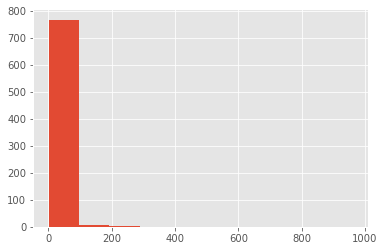

In [106]:
Audit_Risk =audit["Audit_Risk"]
plt.hist(Audit_Risk)

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 305.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

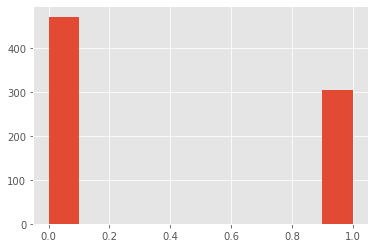

In [111]:
Risk =audit["Risk"]
plt.hist(Risk )